In [4]:
%matplotlib inline
import sticker
import fgsm
from utilities import query_to_labels, url_to_im
from glob import glob
from time import time
from os import remove
import numpy as np
from distill import create_distilled
import torch
from time import sleep

import matplotlib.pyplot as plt


In [5]:
#Save baseline once, exclude afterwards!!!
#Baseline for 25 images: 0.5831569316
device = torch.device('cuda:0')
model = create_distilled(device)

def fgsm_test(model,bounds=[5,25]):
    convsum_ad = {key:0 for key in bounds}
    times = {key:0 for key in bounds}
    a = fgsm.FGSM(model=model)
    a.print = False
    imlist = glob("Val_Delete!\\*")
    for bound in bounds:
        a.bound=bound
        times[bound]=time()
        for imurl in imlist:
            conv = a.simple_attack(imurl, "temp.png")
            convsum_ad[bound] += conv
            im = url_to_im ("temp.png")
            plt.imshow(im)
            plt.show()
            print(conv)
            sleep(1)
        times[bound] = time()-times[bound]
    try:
        remove("temp.png")
    except:
        pass
    
    for key in bounds: 
        print("average confidence for bound = " + str(key) + ": " + str(convsum_ad[key]/len(imlist)))
        print("time taken: " + str(times[key]) + " seconds")
    
    
    

In [ ]:
fgsm_test(model)

Val_Delete!\adler.png


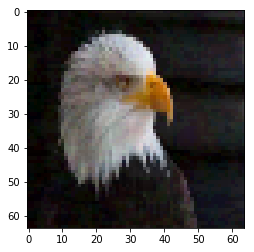

0.2432861
Val_Delete!\ampel.png


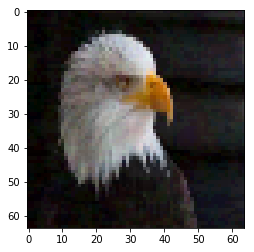

0.78029478
Val_Delete!\bmw.png


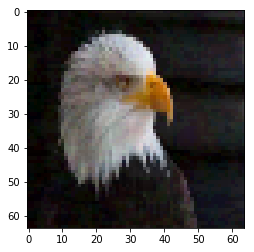

0.50275189
Val_Delete!\brücke.png


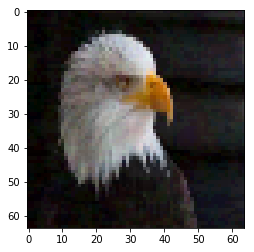

0.99667138
Val_Delete!\Chess.png


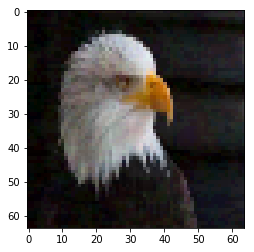

0.02272727
Val_Delete!\Crowd_in_street.png


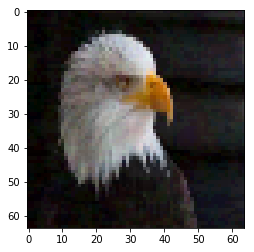

0.54367608
Val_Delete!\Döner.png


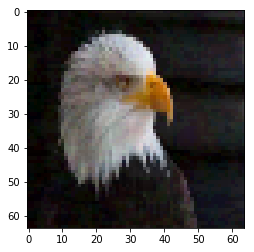

0.32026312
Val_Delete!\eisbär.png


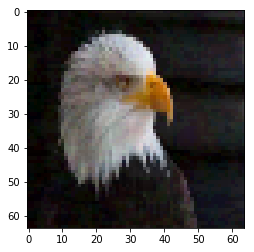

0.84093833
Val_Delete!\GI.png


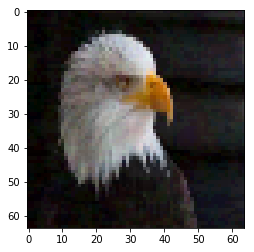

0.4198935
Val_Delete!\GI_2.png


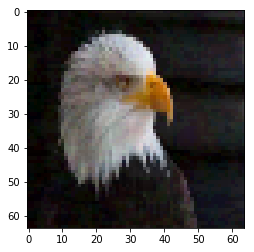

0.95854884
Val_Delete!\Hai.png


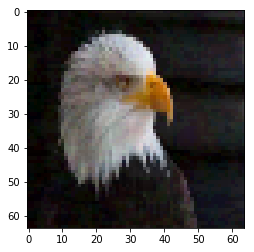

0.00151573
Val_Delete!\haus.png


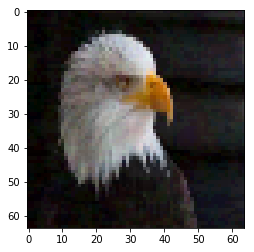

0.44644672
Val_Delete!\hund.png


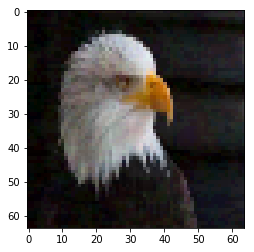

0.80691355
Val_Delete!\katze.png


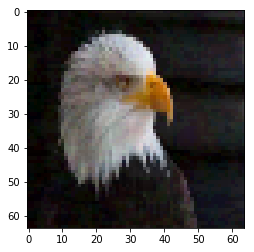

0.28220096
Val_Delete!\Larix_decidua_Aletschwald.png


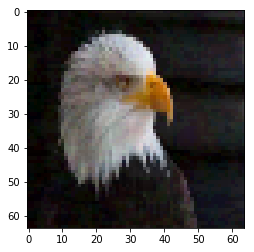

0.17504211
Val_Delete!\lkw.png


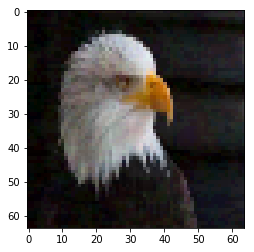

0.37873957
Val_Delete!\nacht.png


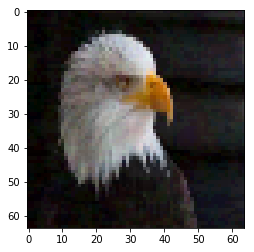

0.26024345
Val_Delete!\neon.png


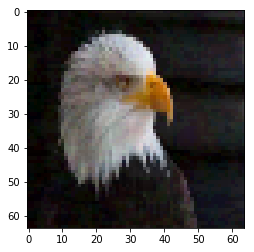

0.99380255
Val_Delete!\paris.png


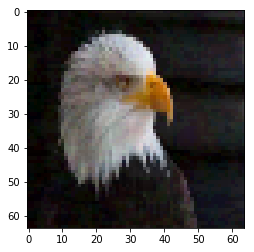

0.56224132
Val_Delete!\strand.png


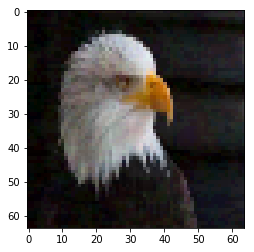

0.99968565
Val_Delete!\street.png


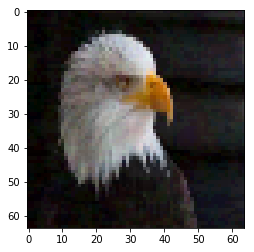

0.45961177
Val_Delete!\verbot.png


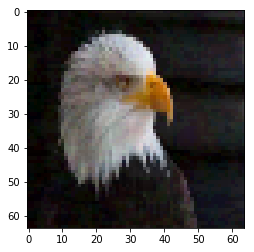

0.96777457
Val_Delete!\verbot2.png


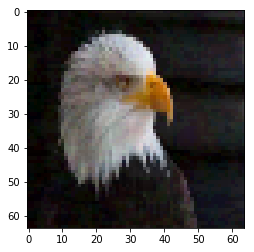

0.94223624
Val_Delete!\weihnacht.png


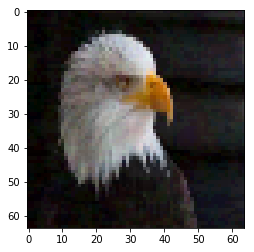

0.87855929
Val_Delete!\winter.png


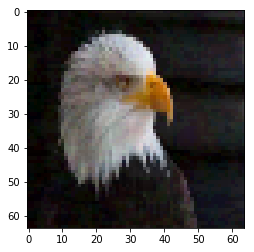

0.79485852
baseline confidence: 0.5831569316


In [50]:
convsum_base = 0
a = fgsm.FGSM(model=model)
a.print = False
imlist = glob("Val_Delete!\\*")

for imurl in imlist:
    conv = np.max(query_to_labels(imurl))
    print(imurl)
    convsum_base += conv
    im = url_to_im ("temp.png")
    plt.imshow(im)
    plt.show()
    print(conv)
        
print("baseline confidence: " + str(convsum_base/len(imlist)))


In [1]:
from utilities import query_to_text

In [2]:
for i in range(70):
    query_to_text("temp.png")
               

Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
400 invalid PNG image


ServerError: Too many retries.400 invalid PNG image

In [3]:
name = "Adam_Sandler"

base_directory = "C:\\Users\\flodo\\Desktop\\Infocup_Data\\Adversarial_bases\\"
target_directory = "C:\\Users\\flodo\\Desktop\\Infocup_Data\\Advers_working\\"

imurl= base_directory+name+".png"
save_url=target_directory+name+".png"

fgsm.preview_im(imurl)
a.simple_attack(imurl,save_url)


Labels with highest confidence:
Vorfahrt (label 12): 0.44052419
Zulässige Höchstgeschwindigkeit (30) (label 1): 0.11033559
Baustelle (label 25): 0.07293988
Stoppschild (label 14): 0.06493238
Vorfahrt gewähren (label 13): 0.04811269
try attacking one of those labels!
attacking label 12

step: 1
MSE White vs Black Box before retraining:
0.0252857131031
MSE White vs Black Box after retraining:
0.012326393276453018
probability: Whitebox
0.993827760219574
probability: Blackbox
0.88649476

step: 2
MSE White vs Black Box before retraining:
0.0115203729361
MSE White vs Black Box after retraining:
0.011275384575128555
probability: Whitebox
0.9957209229469299
probability: Blackbox
0.90685701

step: 3
MSE White vs Black Box before retraining:
0.00789679502424
MSE White vs Black Box after retraining:
0.00775955431163311
probability: Whitebox
0.9955862760543823
probability: Blackbox
0.90741205

step: 4
MSE White vs Black Box before retraining:
0.00777469414029
MSE White vs Black Box after retrainin

0.91273910000000003

In [4]:
a.simple_attack(im, target_label, save_url, bound=15, mode="l_inf",target_threshold=0.9,max_inner_steps=30)

NameError: name 'im' is not defined

In [7]:
from os import remove
try:
    remove("3123123123123112")
except(FileNotFoundError):
    print(2)

2


In [3]:
for i in range(43):
    a.make_sticker(i,title="7_block_central")

Confidence for Sticker on label 2: 0.01730714
Confidence for Sticker on label 3: 0.90082157
Sticker saved under Quickstick\3\7_block_central0.010.90082157.png
Confidence for Sticker on label 4: 0.09539092
Confidence for Sticker on label 8: 0.99852258
Sticker saved under Quickstick\8\7_block_central0.010.99852258.png
Confidence for Sticker on label 9: 0.07509521
Confidence for Sticker on label 10: 0.9399305
Sticker saved under Quickstick\10\7_block_central0.010.9399305.png
Confidence for Sticker on label 13: 0.02406728
Confidence for Sticker on label 14: 0.29954457
Confidence for Sticker on label 17: 0.9982937
Sticker saved under Quickstick\17\7_block_central0.010.9982937.png
Confidence for Sticker on label 18: 0.01623129
Confidence for Sticker on label 19: 0.02638045
Confidence for Sticker on label 22: 0.03525138
Confidence for Sticker on label 25: 0.98064834
Sticker saved under Quickstick\25\7_block_central0.010.98064834.png
Confidence for Sticker on label 31: 0.01024869
Confidence fo

In [4]:
print(a.queries)

30


In [5]:
sticker.sticker_attack("C:\\Users\\flodo\\Desktop\\Infocup_Data\\Adversarial_bases\\Zaini_Abdullah.png","C:\\Users\\flodo\\Desktop\\Infocup_Data\\Advers_working\\Zaini_Abdullah_stick.png",label=10)

0.99999678


In [5]:
5/1.2

4.166666666666667